# Hierarchial Clustering Outline
### Using Iris Dataset off Kaggle for Practice

## Obtain

In [63]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#normalize data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#hierarchial clustering libraries
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram,linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 


In [3]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Scrub

In [20]:
#set id to index
df = df.set_index(['Id'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [23]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

---

**Normalize Numerical and Categorical Columns**

In [36]:
num_cols = df.select_dtypes('number')
num_cols.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [58]:
x = num_cols.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
num_cols_scaled = pd.DataFrame(x_scaled, index = num_cols.index, 
                              columns = num_cols.columns)
num_cols_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,0.222222,0.625000,0.067797,0.041667
2,0.166667,0.416667,0.067797,0.041667
3,0.111111,0.500000,0.050847,0.041667
4,0.083333,0.458333,0.084746,0.041667
5,0.194444,0.666667,0.067797,0.041667


---

In [52]:
cat_cols = df.select_dtypes('object')
cat_cols.head()

,Species
Id,
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa


In [44]:
cat_cols.nunique()

Species    3
dtype: int64

In [59]:
x = cat_cols.values
labelencoder = LabelEncoder()
iris = labelencoder.fit_transform(x)
cat_cols_scaled = pd.DataFrame(iris, index = cat_cols.index, 
                              columns = cat_cols.columns)
cat_cols_scaled.head()

/Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Species
Id,
1,0
2,0
3,0
4,0
5,0


In [64]:
df_scaled = pd.merge(num_cols_scaled, cat_cols_scaled, left_index = True,
              right_index = True)
df_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,0.222222,0.625000,0.067797,0.041667,0
2,0.166667,0.416667,0.067797,0.041667,0
3,0.111111,0.500000,0.050847,0.041667,0
4,0.083333,0.458333,0.084746,0.041667,0
5,0.194444,0.666667,0.067797,0.041667,0


## Explore

**Select columns to compare. Adding the categorical column throws everything off. Need to ask if I executed that correctly**

In [120]:
#select columns
X = df_scaled.iloc[:, [0,3]].values

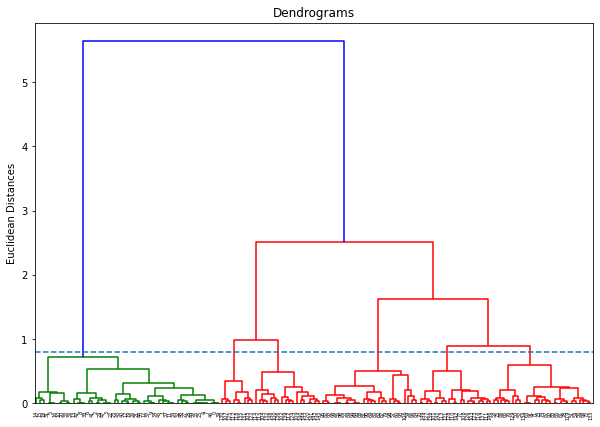

In [121]:
#plot dengrogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(linestyle='--', y=.8) 
plt.ylabel('Euclidean Distances')
plt.show()

## Model

In [122]:
cluster = AgglomerativeClustering(n_clusters = 6, 
                                 affinity = 'euclidean',
                                 linkage = 'ward')
cluster.fit(X)
labels = cluster.labels_

In [123]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1,
       3, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 5, 2, 5, 2, 5, 4, 3, 4, 2, 5,
       2, 2, 5, 2, 5, 5, 2, 4, 4, 1, 5, 2, 4, 2, 5, 4, 2, 2, 2, 1, 4, 4,
       5, 1, 1, 4, 5, 2, 2, 5, 5, 5, 2, 5, 5, 5, 2, 2, 5, 2])

Text(0.5, 1.0, 'Clusters')

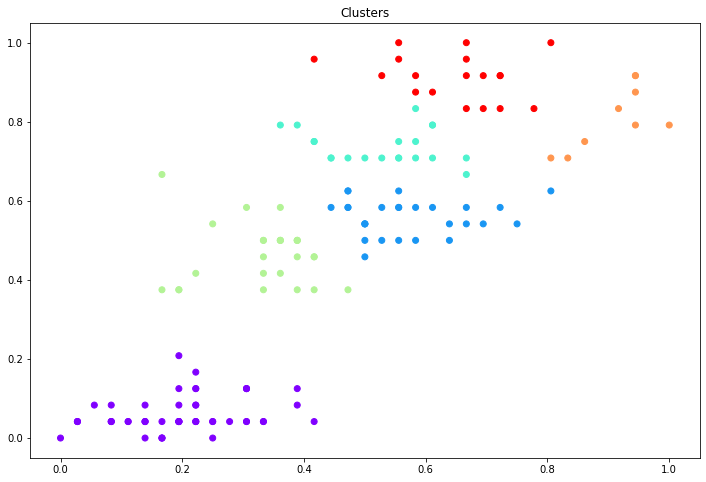

In [125]:
#visualize clusters
plt.figure(figsize = (12,8))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap = 'rainbow')
plt.title('Clusters')

---

## Interpret